<a href="https://colab.research.google.com/github/itberrios/think_autonomous/blob/main/neural_optimization_course/Mini_Quantization_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Quantization Workshop

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fp32_values = np.random.uniform(low = 0.0, high=5.0, size= (10))
print(fp32_values)

[1.10812544 0.37637716 4.98705334 4.7613509  0.16367172 3.95333931
 4.97492134 2.51152049 2.83888598 1.2719727 ]


In [5]:
fp32_max = fp32_values.max()
fp32_min = fp32_values.min()
print(fp32_min, fp32_max)

0.16367172086515502 4.987053343476096


### Calculating the Scale

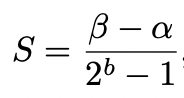

In [22]:
S = (fp32_max - fp32_min) / (2**8 - 1)
print(S)

0.018915222049454672


### Calculating Z

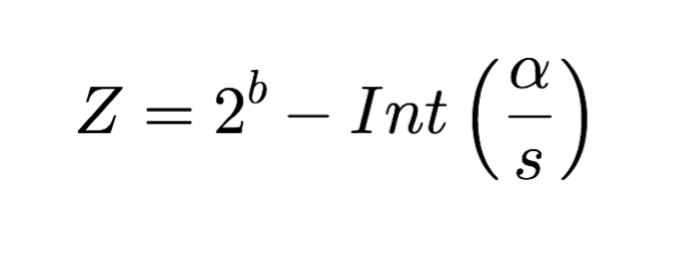

In [24]:
Z = 2**8 - int(fp32_min/S)
print(Z)

248


### Calculating the Q Values

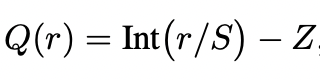

In [31]:
q_values = (fp32_values/S).astype(np.uint8) + np.uint8(Z)

In [32]:
print(fp32_values)
print(q_values)

[1.10812544 0.37637716 4.98705334 4.7613509  0.16367172 3.95333931
 4.97492134 2.51152049 2.83888598 1.2719727 ]
[ 50  11 255 243   0 201 255 124 142  59]


## Plot the Results

In [33]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fp32_text = [str(round(x,2)) for x in fp32_values.tolist()]
int8_text = [str(round(x,2)) for x in q_values.tolist()]

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=np.arange(len(fp32_values)), y=fp32_values, text = fp32_text,
                    mode='markers+text', textposition="top left",
                    name='fp32_values'), row=1, col=1)

fig.add_trace(go.Scatter(x=np.arange(len(q_values)), y=q_values, text = int8_text,
                    mode='markers+text', textposition="bottom right",
                    name='Quantized values'), row=1, col=2)

fig.update_layout(height=500, width=1000, title_text="Quantization - fp32 -> int8 mapping")
fig.show()